# **Students College Applications Prediction**

This notebook implements *naive bayes* to predict whether students applications to college are admitted or not. The main goal is to visualize the confusion matrix of how accurate our prediction results for the validation set.

## Getting Ready

Before anything, we start off by importing libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
sns.set_style('whitegrid')

### Training Dataset

In [3]:
gmat = [780, 750, 690, 710, 680,
        730, 690, 720, 740, 690,
        610, 690, 710, 680, 770,
        610, 580, 650, 540, 590,
        620, 600, 550, 550, 570,
        670, 660, 580, 650, 660,
        640, 620, 660, 660, 680,
        650, 670, 580, 590, 690]
        
gpa = [4, 3.9, 3.3, 3.7, 3.9,
       3.7, 2.3, 3.3, 3.3, 1.7,
       2.7, 3.7, 3.7, 3.3, 3.3,
       3, 2.7, 3.7, 2.7, 2.3, 
       3.3, 2, 2.3, 2.7, 3,
       3.3, 3.7, 2.3, 3.7, 3.3,
       3, 2.7, 4, 3.3, 3.3, 
       2.3, 2.7, 3.3, 1.7, 3.7]

work_experience = [3, 4, 3, 5, 4,
                   6, 1, 4, 5, 1,
                   3, 5, 6, 4, 3,
                   1, 4, 6, 2, 3,
                   2, 1, 4, 1, 2,
                   6, 4, 2, 6, 5,
                   1, 2, 4, 6, 5,
                   1, 2, 1, 4, 5]

admitted = [1, 1, 0, 1, 0, 
            1, 0, 1, 1, 0, 
            0, 1, 1, 0, 1, 
            0, 0, 1, 0, 0, 
            1, 0 ,0, 0, 0, 
            1, 1, 0, 1, 1, 
            0, 0, 1, 1, 1, 
            0, 0, 0, 0, 1]

df = pd.DataFrame({
  'gmat': gmat,
  'gpa': gpa,
  'work_experience': work_experience,
  'admitted': admitted
})

### Testing Dataset

In [4]:
gma_test = [590, 740, 680, 610, 710]
gpa_test = [2, 3.7, 3.3, 2.3, 3]
work_experience_test = [3, 4, 6, 1, 5]

X_test = pd.DataFrame({
    'gma': gma_test,
    'gpa': gpa_test,
    'work_experience': work_experience_test
})

## Exploratory Data Analysis

Then, we grasp some knowledge about the dataset.

In [5]:
print('Training Set Shape:', df.shape)

Training Set Shape: (40, 4)


In [6]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gmat,40.0,654.000,61.427464,540.0,607.5,660.0,690.0,780.0
gpa,40.0,3.095,0.631218,1.7,2.7,3.3,3.7,4.0
work_experience,40.0,3.425,1.737778,1.0,2.0,4.0,5.0,6.0
admitted,40.0,0.475,0.505736,0.0,0.0,0.0,1.0,1.0


In [8]:
df.isna().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [10]:
df['admitted'].value_counts()

0    21
1    19
Name: admitted, dtype: int64

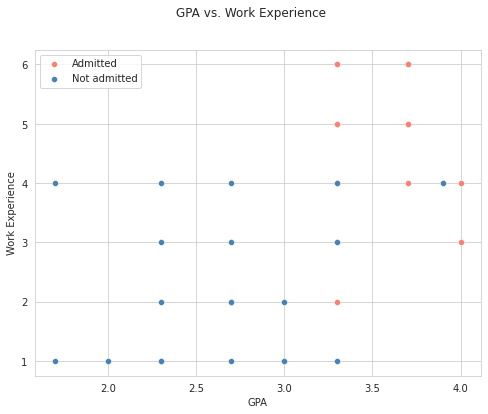

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('GPA vs. Work Experience')
sns.scatterplot(x=df['gpa'][df['admitted'] == 1],
                y=df['work_experience'][df['admitted'] == 1],
                color='salmon')

sns.scatterplot(x=df['gpa'][df['admitted'] == 0],
                y=df['work_experience'][df['admitted'] == 0],
                color='steelblue')

plt.xlabel('GPA')
plt.ylabel('Work Experience')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

The above chart implies that the higher the `gpa` and the more years of `working_experience` will most likely to be admitted.

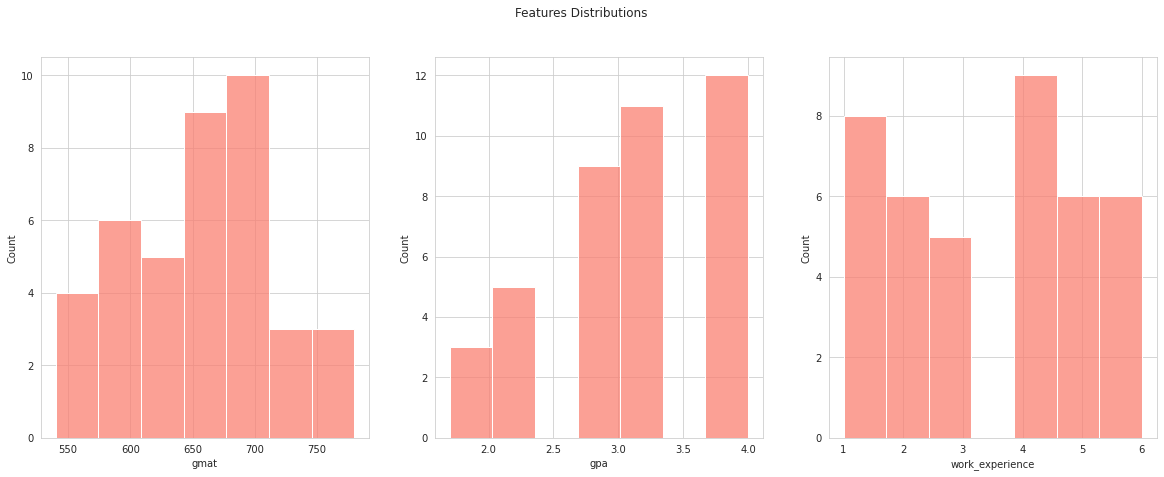

In [12]:
index = 0
features = df.columns[:-1]
fig, axes = plt.subplots(nrows=1, 
                         ncols=3, 
                         figsize=(20, 7))

fig.suptitle('Features Distributions')
for feature in features:
  sns.histplot(df[feature], ax=axes[index], color='salmon')
  index += 1

plt.show()

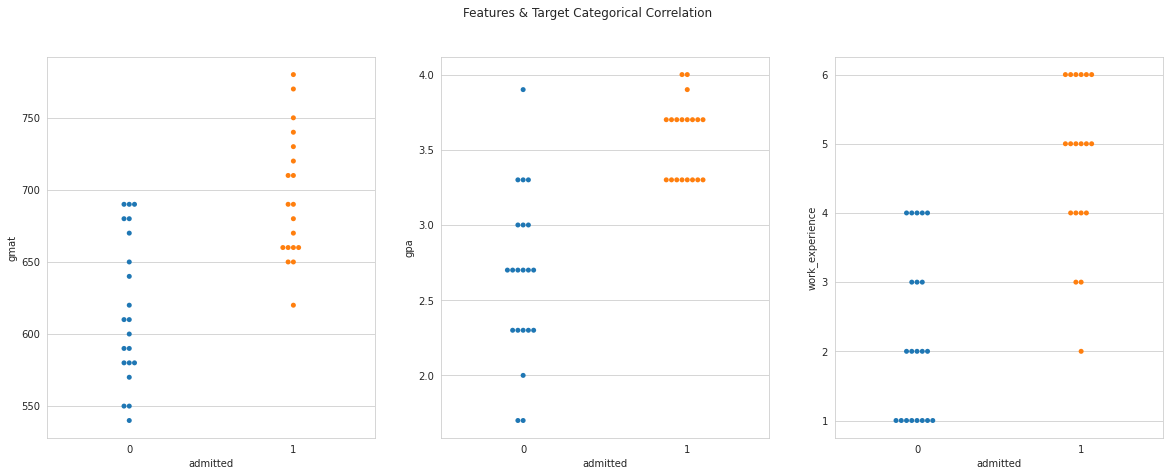

In [13]:
index = 0
fig, axes = plt.subplots(nrows=1, 
                         ncols=3, 
                         figsize=(20, 7))

fig.suptitle('Features & Target Categorical Correlation')
for feature in features:
  sns.swarmplot(x='admitted', y=feature, ax=axes[index], data=df)
  index += 1

plt.show()

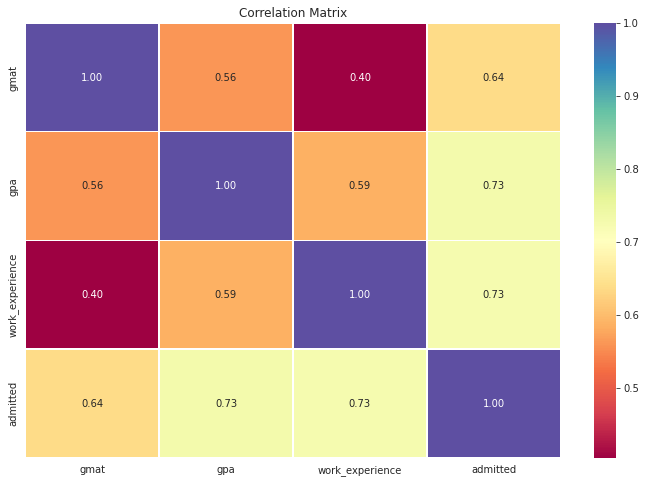

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), 
            cmap='Spectral', 
            annot=True, 
            linewidths=0.5,
            fmt='.2f', 
            ax=ax).set_title('Correlation Matrix')

plt.show()

By the looks of things, it is not necessary to drop any features except to scale them.

## Data Preprocessing

We prepare our data before we proceed to modeling and predicting.

In [15]:
X = df.drop('admitted', axis=1)
y = df['admitted']

In [16]:
X.head()

,gmat,gpa,work_experience
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [17]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: admitted, dtype: int64

### Data Splitting

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=24)

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)

X_train shape: (30, 3)
X_val shape: (10, 3)
y_train shape: (30,)
y_val shape: (10,)


### Features Scaling

In [19]:
scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
scaled_X_val = pd.DataFrame(scaler.fit_transform(X_val), index=X_val.index, columns=X_val.columns)

In [20]:
scaled_X_train

,gmat,gpa,work_experience
6,0.625000,0.260870,0.0
20,0.333333,0.695652,0.2
16,0.166667,0.434783,0.6
14,0.958333,0.695652,0.4
33,0.500000,0.695652,1.0
24,0.125000,0.565217,0.2
12,0.708333,0.869565,1.0
37,0.166667,0.695652,0.0
13,0.583333,0.695652,0.6
26,0.500000,0.869565,0.6


In [21]:
scaled_X_val

,gmat,gpa,work_experience
31,0.368421,0.411765,0.2
25,0.631579,0.764706,1.0
39,0.736842,1.000000,0.8
2,0.736842,0.764706,0.4
5,0.947368,1.000000,1.0
8,1.000000,0.764706,0.8
27,0.157895,0.176471,0.2
10,0.315789,0.411765,0.4
22,0.000000,0.176471,0.6
21,0.263158,0.000000,0.0


## Modeling

We define a class with functions for our model to classify the given dataset.

In [22]:
class NaiveBayesClassifier():
  
  def get_prior(self, features, target):
    self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
    return self.prior

  def get_statistics(self, features, target):
    self.mean = features.groupby(target).apply(np.mean).to_numpy()
    self.var = features.groupby(target).apply(np.var).to_numpy()
    return self.mean, self.var

  def get_density(self, idx, x):
    mean = self.mean[idx]
    var = self.var[idx]
    e = np.exp((-1/2) * ((x - mean) ** 2) / (2 * var))
    return np.sqrt(2 * np.pi * var) * e

  def get_posterior(self, x):
    posteriors = []
    for i in range(self.count):
      prior = np.log(self.prior[i])
      conditional = np.sum(np.log(self.get_density(i, x)))
      posterior = prior + conditional
      posteriors.append(posterior)
    return self.classes[np.argmax(posteriors)]

  def fit(self, features, target):
    self.classes = np.unique(target)
    self.count = len(self.classes)
    self.feature_nums = features.shape[1]
    self.rows = features.shape[0]
    self.get_statistics(features, target)
    self.get_prior(features, target)

  def predict(self, features):
    preds = [self.get_posterior(feature) for feature in features.to_numpy()]
    return preds

We also define an additional function for plotting the confusion matrix.

In [23]:
def plot_confusion_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(6, 6))
  fig.suptitle('Confusion Matrix')
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot=True,
                   cbar=False,
                   cmap='flare')
  
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

### Model Predictions

In [24]:
model = NaiveBayesClassifier()
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_val)

In [25]:
result_df = pd.DataFrame({
    'y_val': y_val,
    'y_pred': y_pred 
})

result_df

,y_val,y_pred
31,0,0
25,1,1
39,1,1
2,0,0
5,1,1
8,1,1
27,0,0
10,0,0
22,0,0
21,0,0


### Evaluation

In [26]:
print(f'Accuracy: {accuracy_score(y_val, y_pred)*100:g}%')

Accuracy: 100%


### Confusion Matrix

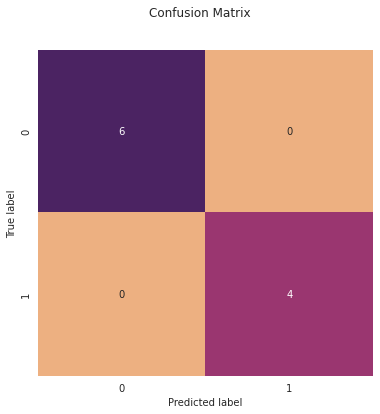

In [27]:
plot_confusion_matrix(y_val, y_pred)

From the confusion matrix, we can see a very accurate prediction by the model.

## Test Data Predictions

After modeling and validating, we might want to predict the testing dataset given prior.

In [28]:
X_test

,gma,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


### Features Scaling

In [29]:
scaler = MinMaxScaler()
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

### Model Predictions

In [30]:
model = NaiveBayesClassifier()
model.fit(scaled_X_train, y_train)
y_test = model.predict(scaled_X_test)
y_test

[0, 1, 1, 0, 1]

In [31]:
test_df = pd.concat([X_test, pd.Series(y_test, name='admitted')], axis=1)
test_df

,gma,gpa,work_experience,admitted
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1


Therefore, we have the model prediction for the given testing dataset.